In [1]:
# import Pandas and Numpy packages

import pandas as pd

import numpy as np

import seaborn as sns

sns.set_theme(palette="Set2")

In [2]:
data = pd.read_csv("df.csv")
data.head()

,trans_date_trans_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,latitude,longitude,city_population,job,day_of_birth,trans_number,unix_time,merchant_lat,merchant_long,fraud
0,2/1/2021 0:02,4.750000e+12,fraud_Kling-Grant,grocery_net,19.46,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,...,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,0442179ed2d64942bc45c5442c3d5895,1328054544,41.587290,-87.582956,0
1,2/1/2021 0:03,4.330000e+15,fraud_Huel-Langworth,misc_net,13.01,Scott,Martin,M,7483 Navarro Flats,Freedom,...,43.0172,-111.0292,471,"Education officer, museum",8/2/1967,ef5b8cbad64ceecb8d1b81960a49b467,1328054607,42.032369,-111.700448,0
2,2/1/2021 0:05,4.720000e+18,"fraud_Streich, Hansen and Veum",gas_transport,50.02,Robert,Drake,M,463 Willie Estates,Burbank,...,36.6966,-96.7869,471,Sub,3/30/1941,eae42972de9670a3d907035c0594d494,1328054744,36.413203,-95.986495,0
3,2/1/2021 0:06,1.800000e+14,fraud_Johns Inc,entertainment,6.11,Jared,Camacho,M,4257 Perez Mall,Canton,...,40.8027,-81.3739,192805,Building control surveyor,6/30/1963,2832eb7d75a6f04468c3e52b03103090,1328054781,40.576060,-81.529672,0
4,2/1/2021 0:08,4.540000e+18,fraud_Spinka Inc,grocery_net,32.14,Nathan,Mendoza,M,767 Adam Mill Apt. 115,Espanola,...,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,7/18/1972,345575e8bebaaed20c5ded6694383a3a,1328054900,35.125220,-105.981956,0


In [3]:
data.nunique()

trans_date_trans_time    437161
credit_card_number          320
merchant                    693
category                     14
amount                    47121
first_name                  346
last_name                   478
gender                        2
street                      960
city                        876
state                        51
zip_code                    947
latitude                    945
longitude                   946
city_population             863
job                         491
day_of_birth                945
trans_number             975036
unix_time                958061
merchant_lat             947225
merchant_long            963180
fraud                         2
dtype: int64

In [4]:
dups = data.duplicated()
print(dups.any())

False


In [5]:
data.shape

(975036, 22)

In [6]:
import pandas as pd
from datetime import datetime


# Change 'trans_date_trans_time' to datetime format
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Convert 'day_of_birth' to datetime format
data['day_of_birth'] = pd.to_datetime(data['day_of_birth'])

# Calculate 'age' based on 'day_of_birth'
current_date = datetime.now()
data['age'] = current_date.year - data['day_of_birth'].dt.year

# Drop the original 'day_of_birth' column
data.drop(columns=['day_of_birth'], inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975036 entries, 0 to 975035
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  975036 non-null  datetime64[ns]
 1   credit_card_number     975036 non-null  float64       
 2   merchant               975036 non-null  object        
 3   category               975036 non-null  object        
 4   amount                 975036 non-null  float64       
 5   first_name             975036 non-null  object        
 6   last_name              975036 non-null  object        
 7   gender                 975036 non-null  object        
 8   street                 975036 non-null  object        
 9   city                   975036 non-null  object        
 10  state                  975036 non-null  object        
 11  zip_code               975036 non-null  int64         
 12  latitude               975036 non-null  floa

In [7]:

 

# Extract date, month, year, and hour into separate columns
data['transaction_date'] = data['trans_date_trans_time'].dt.date
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

 

# Drop the original transaction date and time column if needed
data.drop(columns=['trans_date_trans_time'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975036 entries, 0 to 975035
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   credit_card_number  975036 non-null  float64
 1   merchant            975036 non-null  object 
 2   category            975036 non-null  object 
 3   amount              975036 non-null  float64
 4   first_name          975036 non-null  object 
 5   last_name           975036 non-null  object 
 6   gender              975036 non-null  object 
 7   street              975036 non-null  object 
 8   city                975036 non-null  object 
 9   state               975036 non-null  object 
 10  zip_code            975036 non-null  int64  
 11  latitude            975036 non-null  float64
 12  longitude           975036 non-null  float64
 13  city_population     975036 non-null  int64  
 14  job                 975036 non-null  object 
 15  trans_number        975036 non-nul

In [9]:
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = data.drop(['fraud'], axis=1)  # Features (all columns except 'fraud')
y = data['fraud']  # Target variable

print("Dataset Shape:", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("Train and Test Shape:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Dataset Shape: (975036, 24) (975036,)
Train and Test Shape: (780028, 24) (195008, 24) (780028,) (195008,)


In [10]:


# Select only numeric columns (excluding non-numeric and irrelevant features)
numeric_columns = data[['amount', 'latitude', 'longitude', 'merchant_lat', 'merchant_long', 'age']]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a multiplier for outlier detection (commonly set to 1.5)
outlier_multiplier = 1.5

# Create boolean masks for outlier detection
lower_bound = Q1 - outlier_multiplier * IQR
upper_bound = Q3 + outlier_multiplier * IQR
outlier_mask = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)

# Filter the DataFrame to remove outliers
data2 = data[~outlier_mask]

data2.shape

fraud_counts = data2['fraud'].value_counts()

print("AFTER OUTLIERS REMOVAL:")
print(fraud_counts)

AFTER OUTLIERS REMOVAL:
0    886881
1      1251
Name: fraud, dtype: int64


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


# Separate the features and target variable
X = data.drop(['fraud'], axis=1)  # Features (all columns except 'fraud')
y = data['fraud']  # Target variable

# Convert categorical variables to numerical representations
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'job', 'trans_number', 'transaction_date']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # You can adjust the explained variance ratio as needed
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the target variable 'fraud' back to the DataFrame
pca_df['fraud'] = y

# Now 'pca_df' contains the principal components and the target variable 'fraud'


C:\Users\Dell Latitude 7240\AppData\Local\Temp\ipykernel_1720\3991981481.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Fraud')


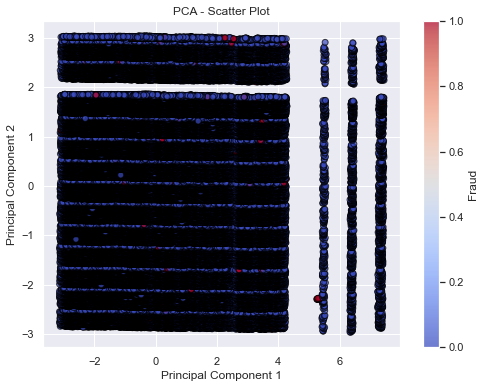

In [15]:
import matplotlib.pyplot as plt

# Create a scatter plot for the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Scatter Plot')
plt.colorbar(label='Fraud')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already performed PCA on the training set as shown in the previous code

# Get the explained variance ratio from the PCA object
explained_variance_ratio = pca.explained_variance_ratio_

# Create an array of component numbers for the x-axis
components = np.arange(1, len(explained_variance_ratio) + 1)

# Plot the explained variance ratio
plt.plot(components, explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Explained Variance Ratio for each Principal Component')
plt.grid()
plt.show()


In [16]:
pca.fit(X)

PCA(n_components=0.95)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = data.drop(['fraud'], axis=1)  # Features (all columns except 'fraud')
y = data['fraud']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to numerical representations for the training set
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'job', 'trans_number', 'transaction_date']
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Perform feature scaling for the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA on the training set
pca = PCA(n_components=0.95)  # You can adjust the explained variance ratio as needed
X_train_pca = pca.fit_transform(X_train_scaled)

# Create a new DataFrame with PCA components for the training set
pca_train_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# Add the target variable 'fraud' back to the DataFrame for the training set
pca_train_df['fraud'] = y_train

# Now 'pca_train_df' contains the principal components and the target variable 'fraud' for the training set


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already performed PCA and obtained 'pca_df' (training set) or 'pca_test_df' (testing set)
# and you want to visualize the first three principal components

# Plot for the first principal component (PC1)
plt.figure(figsize=(10, 6))
plt.plot(pca_df['PC1'], label='PC1', marker='o', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Principal Component Value')
plt.title('Line Plot of PC1')
plt.legend()
plt.show()

# Plot for the second principal component (PC2)
plt.figure(figsize=(10, 6))
plt.plot(pca_df['PC2'], label='PC2', marker='o', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Principal Component Value')
plt.title('Line Plot of PC2')
plt.legend()
plt.show()

# Plot for the third principal component (PC3)
plt.figure(figsize=(10, 6))
plt.plot(pca_df['PC3'], label='PC3', marker='o', linestyle='-')
plt.xlabel('Sample Index')
plt.ylabel('Principal Component Value')
plt.title('Line Plot of PC3')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate the features and target variable
X = data.drop(['fraud'], axis=1)  # Features (all columns except 'fraud')
y = data['fraud']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to numerical representations
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'job', 'trans_number', 'transaction_date']
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Perform feature scaling on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA on the scaled training set
pca = PCA(n_components=0.95)  # You can adjust the explained variance ratio as needed
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the number of principal components
num_components = X_train_pca.shape[1]

# Create a list of feature names
feature_names = [f'PC{i+1}' for i in range(num_components)]

# Create a DataFrame to store the feature names and their corresponding importance in the principal components
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': pca.explained_variance_ratio_})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance using a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_importance_df) + 1), feature_importance_df['Importance'].cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
print(feature_names)

In [ ]:

# Transform the testing set using the same label encoding and feature scaling applied to the training set
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'job', 'trans_number', 'transaction_date']
for col in categorical_columns:
    X_test[col] = label_encoder.transform(X_test[col])

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# Create a new DataFrame with PCA components for the testing set
pca_test_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Add the target variable 'fraud' back to the DataFrame for the testing set
pca_test_df['fraud'] = y_test

# Now 'pca_test_df' contains the principal components and the target variable 'fraud' for the testing set


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already split your dataset into X_train and X_test

# Calculate correlation matrix for the training dataset
corr_matrix_train = X_train.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Training Dataset')
plt.show()

# Plot scatter plots for selected feature pairs
selected_features = ['feature1', 'feature2']  # Replace 'feature1' and 'feature2' with the names of features you want to compare

for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.title(f'{feature} vs. Target Variable')
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have already split your dataset into X_train and X_test

# Convert categorical variables to numerical representations using label encoding
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'job', 'trans_number', 'transaction_date']

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Calculate correlation matrix for the training dataset
corr_matrix_train = X_train.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Training Dataset')
plt.show()

# Plot scatter plots for selected feature pairs
selected_features = ['feature1', 'feature2']  # Replace 'feature1' and 'feature2' with the names of features you want to compare

for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.title(f'{feature} vs. Target Variable')
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have already split your dataset into X_train and X_test

# Convert categorical variables to numerical representations using label encoding
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'job', 'trans_number', 'transaction_date']

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])


# Add the 'fraud' column back to the training dataset
X_train['fraud'] = y_train

# Calculate correlation matrix for the training dataset
corr_matrix_train = X_train.corr()

# Show the correlation of all variables with the target variable 'fraud'
fraud_corr = corr_matrix_train['fraud'].sort_values(ascending=False)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Training Dataset')
plt.show()

# Show the correlation of all variables with the target variable 'fraud'
print(fraud_corr)

# Plot scatter plots for all features against the target variable 'fraud'
for feature in X_train.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.xlabel(feature)
    plt.ylabel('Target Variable (Fraud)')
    plt.title(f'{feature} vs. Target Variable (Fraud)')
    plt.show()


In [ ]:
X_train.info()

In [ ]:
X_train.head(10)

In [ ]:
# List of irrelevant columns
irrelevant_columns = ['credit_card_number', 'first_name', 'last_name', 'street', 'state', 
                      'merchant_lat', 'merchant_long', 'trans_number', 'longitude', 'city_population', 
                      'latitude', 'merchant', 'zip_code', 'job', 'city']

# Drop the irrelevant columns from the training data
X_train = X_train.drop(irrelevant_columns, axis=1)

X_train.info()


In [ ]:
irrelevant_columns = ['credit_card_number', 'first_name', 'last_name', 'street', 'state', 
                      'merchant_lat', 'merchant_long', 'trans_number', 'longitude', 'city_population', 
                      'latitude', 'merchant', 'zip_code', 'job', 'city']

# Drop the irrelevant columns from the training data
X_test = X_test.drop(irrelevant_columns, axis=1)

X_test.info()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [17]:
# Specify the file path and name for the CSV file
output_file = 'training_set.csv'

# Export the training set data to a CSV file
train_data.to_csv(output_file, index=False)


NameError: name 'train_data' is not defined